In [39]:
# CELL1 – 1 mark
# Write code to read the given data (i.e., “2018-QS-World-University-Rankings-Top200.xlsx”)
# into required tabular data structure (i.e., a DataFrame): make the “rank” (i.e., 1, 2, 3…200)
# be the index of the returned data structure; the first column represents the “Institution Name”; 
# the second column represents the “Location”; the third to eighth columns represent the six QS metrics; 
# and the last column represents the “Overall Score”.
# – Display the returned tabular data structure in your programme (see Sample output 1).

################################################################################################################################
#  libraries needed for the coursework
%pylab inline
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import statsmodels.api as sm
################################################################################################################################

qsworld = pd.read_excel("/Users/ondrejromancov/Desktop/2018-QS-World-University-Rankings-Top200.xlsx", index_col='Rank')
qsworld

Populating the interactive namespace from numpy and matplotlib


ModuleNotFoundError: No module named 'statsmodels'

In [4]:
# CELL2 – 2 marks
# Write code to create a QS-UK-rankings (i.e., a DataFrame) that lists all UK universities
# in the top 200 in the QS-World-University-Rankings. In the returned tabular data structure (i.e., a DataFrame): 
# make the “national rank” (i.e., 1, 2, 3…) be the index; the first column represents the “Institution Name”; 
# the second to seventh columns represent the six QS metrics; and the last column represents the “Overall Score”.
# – Display the returned tabular data structure in your programme (see Sample output 2).

qsuk = qsworld[qsworld['Location']=='United Kingdom']
qsuk = qsuk.reset_index()
qsuk = qsuk.drop(['Location', 'Rank'],axis=1)
qsuk = qsuk.assign(Rank = range(1,29))
qsuk = qsuk.set_index('Rank')
qsuk


,Institution Name,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,Overall Score
Rank,,,,,,,,
1,UNIVERSITY OF CAMBRIDGE,100.0,100.0,100.0,78.3,97.4,97.7,95.6
2,UNIVERSITY OF OXFORD,100.0,100.0,100.0,76.3,98.6,98.5,95.3
3,UCL (UNIVERSITY COLLEGE LONDON),99.7,99.5,99.1,74.7,96.6,100.0,94.6
4,IMPERIAL COLLEGE LONDON,99.4,100.0,100.0,68.7,100.0,100.0,93.7
5,KING'S COLLEGE LONDON (KCL),92.8,92.4,87.6,64.8,97.4,99.2,86.9
6,UNIVERSITY OF EDINBURGH,99.1,96.6,83.2,55.5,94.9,98.6,86.9
7,THE UNIVERSITY OF MANCHESTER,97.4,99.4,75.4,47.5,89.3,98.3,83.0
8,LONDON SCHOOL OF ECONOMICS AND POLITICAL SCIEN...,90.3,100.0,55.9,71.7,100.0,100.0,81.8
9,UNIVERSITY OF BRISTOL,85.7,95.5,79.2,56.4,87.9,79.2,79.5


In [33]:
# CELL3 – 5 marks
# Write code to analyse the data contained in the variable called “Academic Reputation” 
# for the UK universities in the world’s top 200.
# – Print the “mean of Academic Reputation”.
# – Print the “minimum of Academic Reputation”.
# – Print the “maximum of Academic Reputation”.
# – Print the “standard deviation of Academic Reputation”.
# – Print the “95% confidence interval of Academic Reputation”.

a_rep = qsuk['Academic Reputation'].values
a_rep_mean = mean(a_rep)
a_rep_err = 1.96*std(a_rep)/sqrt(len(a_rep))

print('Mean of Academic Reputation: ', round(a_rep_mean,1))
print('Minimum of Academic Reputation: ', (min(a_rep)))
print('Maximum of Academic Reputation: ', (max(a_rep)))
print('Standard Deviation of Academic Reputation: ', round(std(a_rep),1))
print('95% Confidence Interval of Academic Reputation: ', [round(a_rep_mean-a_rep_err), round(a_rep_mean+a_rep_err)])


Mean of Academic Reputation:  70.5
Minimum of Academic Reputation:  39.4
Maximum of Academic Reputation:  100.0
Standard Deviation of Academic Reputation:  21.1
95% Confidence Interval of Academic Reputation:  [63.0, 78.0]


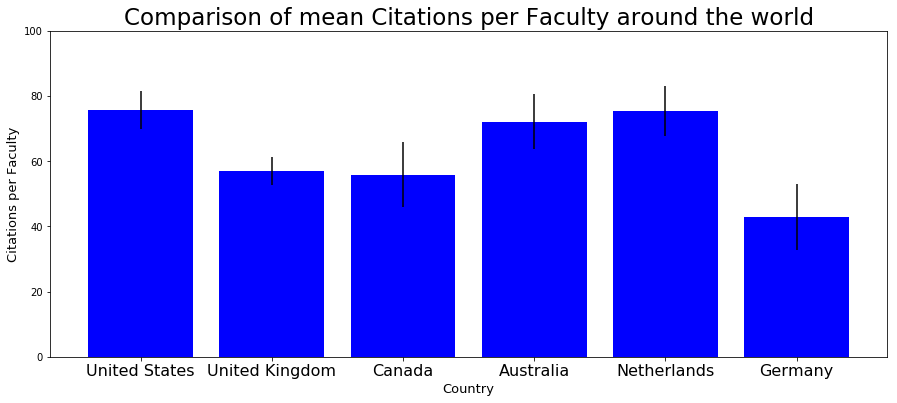

In [5]:
# CELL4 – 9 marks
# Write code to plot a bar graph that uses bars to compare the “Citations per Faculty” of universities
# in the United States, United Kingdom, Canada, Australia, Netherlands and Germany.
# – Visualise a single plot: the horizonal axis shows the data categories being compared
# (i.e., United States, United Kingdom, Canada, Australia, Netherlands and Germany);
# and the vertical axis represents the mean measure of the “Citations per Faculty”.
# – Add error bars to the bar graph, showing the 95% confidence interval.
# – Add appropriate title, horizontal axis label and vertical axis label to the bar graph.

#put means and erors into arrays
us = qsworld[qsworld['Location']=='United States']
cit_us = us['Citations per Faculty']
m_cit_us = mean(cit_us)
err_cit_us = 1.96*std(cit_us)/sqrt(len(cit_us))

uk = qsworld[qsworld['Location']=='United Kingdom']
cit_uk = uk['Citations per Faculty']
m_cit_uk = mean(cit_uk)
err_cit_uk = 1.96*std(cit_uk)/sqrt(len(cit_uk))

ca = qsworld[qsworld['Location']=='Canada']
cit_ca = ca['Citations per Faculty']
m_cit_ca = mean(cit_ca)
err_cit_ca = 1.96*std(cit_ca)/sqrt(len(cit_ca))

au = qsworld[qsworld['Location']=='Australia']
cit_au = au['Citations per Faculty']
m_cit_au = mean(cit_au)
err_cit_au = 1.96*std(cit_au)/sqrt(len(cit_au))

nl = qsworld[qsworld['Location']=='Netherlands']
cit_nl = nl['Citations per Faculty']
m_cit_nl = mean(cit_nl)
err_cit_nl = 1.96*std(cit_nl)/sqrt(len(cit_nl))

de = qsworld[qsworld['Location']=='Germany']
cit_de = de['Citations per Faculty']
m_cit_de = mean(cit_de)
err_cit_de = 1.96*std(cit_de)/sqrt(len(cit_de))

means = [m_cit_us, m_cit_uk, m_cit_ca, m_cit_au, m_cit_nl, m_cit_de]
errors = [err_cit_us,err_cit_uk,err_cit_ca,err_cit_au,err_cit_nl,err_cit_de]

#graph
figure(figsize=(15,6))
N = 6
ind = arange(N)
width = 0.8
bar(ind,means,width,color='b',yerr=errors)
ylabel('Citations per Faculty',fontsize=13)
xlabel('Country',fontsize=13)
xtickloc=ind
xticklabels=['United States', 'United Kingdom', 'Canada', 'Australia', 'Netherlands', 'Germany']
xticks(xtickloc,xticklabels,rotation='horizontal',fontsize=16)
title('Comparison of mean Citations per Faculty around the world',fontsize=23)
ylim([0,100])
show()


In [25]:
# CELL5 – 4 marks
# Write code to perform appropriate statistical data analysis to compare the 
# “Citations per Faculty” of universities in the United States to Netherlands.
# – Print the main results of the data analysis processes, 
# including normality test and statistical significance test.
# – Print ONE sentence, stating your conclusion and justification on the 
# observed difference between two locations.

cit_us_mean = mean(cit_us)
cit_nl_mean = mean(cit_nl)
print('Mean of Citations per Faculty - United States: ', round(cit_us_mean,1))
print('Mean of Citations per Faculty - Netherlands: ', round(cit_nl_mean,1))
#Confidence Interval
cit_us_err = 1.96*std(cit_us)/sqrt(len(cit_us))
cit_nl_err = 1.96*std(cit_nl)/sqrt(len(cit_nl))
print('95% Confidence Interval of Citations per Faculty - United States: ', [round(cit_us_mean-cit_us_err), round(cit_us_mean+cit_us_err)])
print('95% Confidence Interval of Citations per Faculty - Netherlands: ', [round(cit_nl_mean-cit_nl_err), round(cit_nl_mean+cit_nl_err)])
#Normality Test
print('Citations per Faculty - United States is normal? : ',stats.shapiro(cit_us)[1]>0.05)
print('Citations per Faculty - Netherlands is normal? : ',stats.shapiro(cit_nl)[1]>0.05)
#Statistical significance
print("Is the observed difference significant? ",stats.mannwhitneyu(cit_us,cit_nl,alternative='two-sided')[1]<0.05)

#We do not trust the difference
print("The observed difference between the two locations is not significant and therefore there is no statistical difference")

Mean of Citations per Faculty - United States:  75.7
Mean of Citations per Faculty - Netherlands:  75.5
95% Confidence Interval of Citations per Faculty - United States:  [70.0, 82.0]
95% Confidence Interval of Citations per Faculty - Netherlands:  [68.0, 83.0]
Citations per Faculty - United States is normal? :  False
Citations per Faculty - Netherlands is normal? :  True
Is the observed difference significant?  False
The observed difference between the two locations is not significant and therefore there is no statistical difference


In [38]:
# CELL6 – 4 marks
# Based on the six QS metrics (i.e., predictor variables), write code to build a linear regression model 
# to estimate the “Overall Score” for the UK universities in the world’s top 200.

# – Print the resulting linear equation in the programme, using rounded values with TWO decimal places.

# Use the above model/equation to predict the “Overall Score” for the universities in Canada.
# – Construct and display a tabular data structure (i.e., a DataFrame), 
# where index represents the “national rank” (i.e., 1, 2, 3…); the first column represents the “Institution Name”; 
# the second column represents the “Overall Score”; and the last column represents the “Predicted Overall Score”.
# – Print the mean squared error (MSE) – the average of the squares of the errors – of the model.

comb = qsuk[["Academic Reputation","Employer Reputation","Faculty Student","Citations per Faculty","International Faculty","International Students"]]
comb = sm.add_constant(comb)
results = sm.OLS(qsuk["Overall Score"],comb).fit()
print(results.summary())


NameError: name 'sm' is not defined

In [24]:
import scipy
print(scipy.__version__)

1.1.0
